In [370]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

from statsmodels.graphics.api import qqplot

import pmdarima as pm
from pmdarima.model_selection import train_test_split

,countrycode,country,currency_unit,rgdpe,rgdpo,pop,emp,avh,hc,ccon,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
year,,,,,,,,,,,,,,,,,,,,,
2019-01-01,USA,United States,US Dollar,23200364.0,22896074.0,337.790067,163.923538,1796.65,3.749341,18415436.0,...,0.115383,-0.170639,0.016054,0.916386,0.880760,1.132156,0.624469,0.659336,0.917301,1.0
2020-01-01,USA,United States,US Dollar,22676858.0,22335318.0,339.436159,154.939697,1777.88,3.754667,18178182.0,...,0.101375,-0.156366,0.012585,0.923888,0.897646,1.143985,0.615387,0.655343,0.937019,1.0
2021-01-01,USA,United States,US Dollar,24167636.0,23681202.0,340.161441,160.861313,1788.70,3.728173,19576128.0,...,0.108527,-0.178756,0.012626,0.965055,0.923723,1.172494,0.643816,0.664668,1.000000,1.0
2022-01-01,USA,United States,US Dollar,24861132.0,24282706.0,341.534046,165.578491,1789.59,3.813643,20081044.0,...,0.121806,-0.202835,0.013951,1.026436,0.980559,1.253262,0.660781,0.665274,1.128685,1.0
2023-01-01,USA,United States,US Dollar,25641846.0,25034982.0,343.477335,167.539749,1788.88,3.829826,20554382.0,...,0.114642,-0.182735,0.014339,1.067194,1.035291,1.276772,0.690203,0.694781,1.171384,1.0


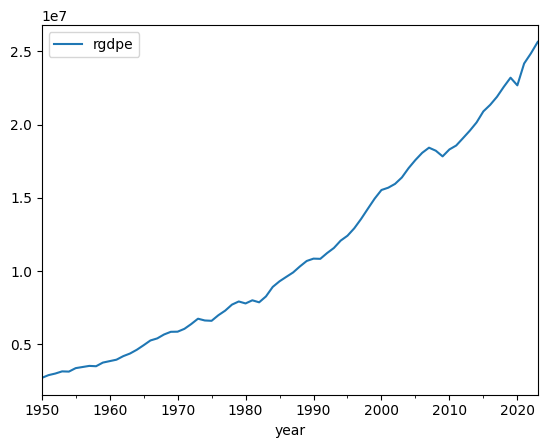

In [371]:

df = pd.read_csv("cleaned_v11.csv", parse_dates=["year"])

# Filter for the country that's entered
country = input("Enter country name: ")
df = df[df['country'] == country]

# transform data to have year as index
df.set_index('year', inplace=True)
df.head()

df.plot(y='rgdpe', use_index=True)

df.tail()

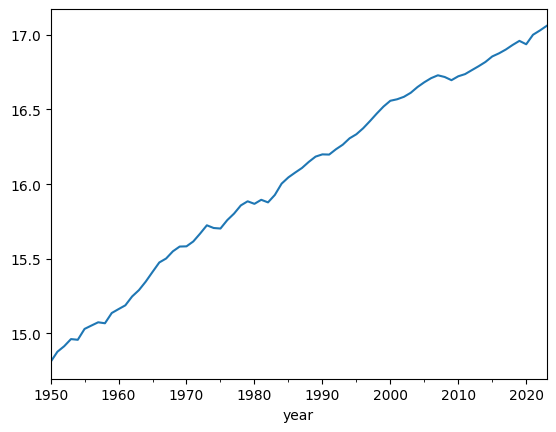

In [372]:
df_log = np.log(df['rgdpe'])
df_log.plot()

train = df["rgdpe"]['1950':'2000']
test = df["rgdpe"]['2000':'2023']


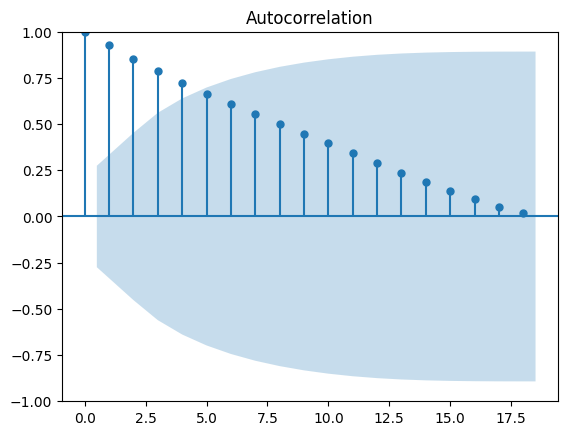

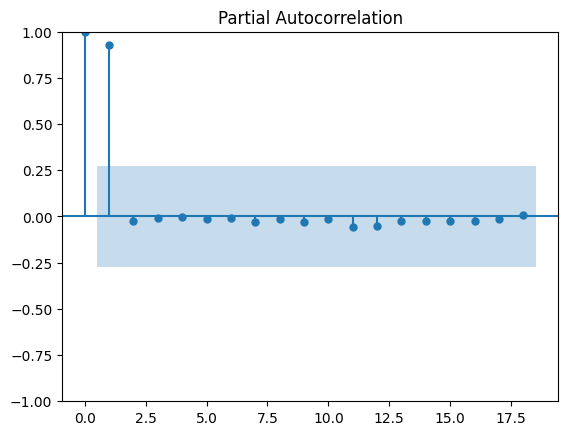

In [373]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_org = plot_acf(train)
pacf_org = plot_pacf(train)
plt.show()

#pacf seems to show random-walkish behavior? 



In [374]:
# do ADF test
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(train)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: 3.307561470893985
p-value: 1.0


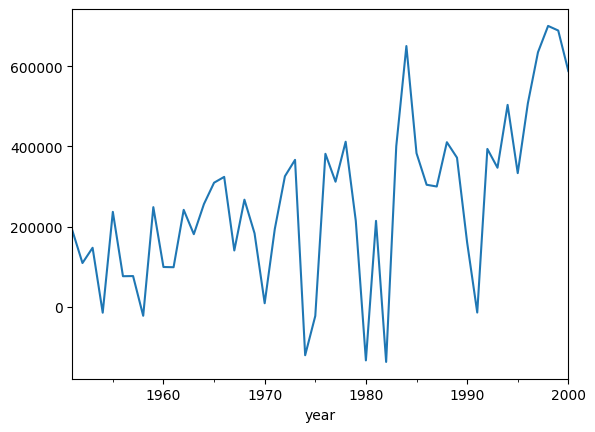

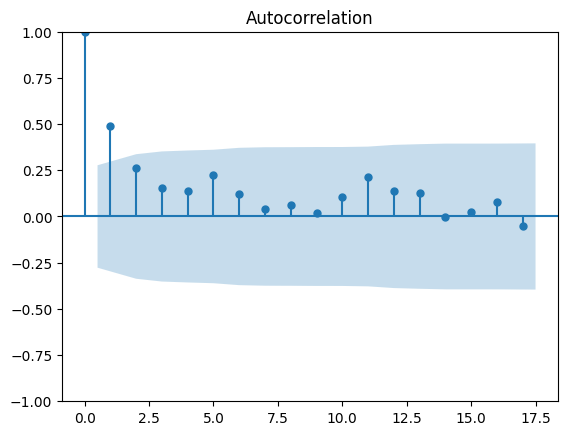

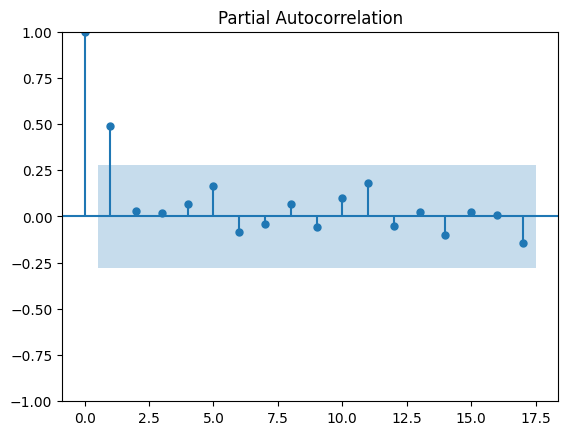

ADF Statistic (differenced): -3.733954831520761
p-value (differenced): 0.003660121625596954


In [375]:
# check if we need to difference it
train_diff = train.diff().dropna()
train_diff.plot()
plt.show()

acf_diff = plot_acf(train_diff)
pacf_diff = plot_pacf(train_diff)
plt.show()

# do adf test again
adf_result_diff = adfuller(train_diff)
print('ADF Statistic (differenced):', adf_result_diff[0])
print('p-value (differenced):', adf_result_diff[1])

In [376]:

model = pm.auto_arima(train, seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=1343.290, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1341.086, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1342.805, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1343.350, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1339.204, Time=0.00 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1345.658, Time=0.04 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.127 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   51
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -668.602
Date:                Sat, 06 Dec 2025   AIC                           1339.204
Time:                        14:32:22   BIC                           1341.096
Sample:                    01-01-1950   HQIC                          1339.922
          

In [377]:
arma_mod20 = ARIMA(df['rgdpe'], order=(2, 1, 1)).fit()

arma_mod30 = ARIMA(df['rgdpe'], order=(3, 0, 1)).fit()
print(arma_mod30.summary())


                               SARIMAX Results                                
Dep. Variable:                  rgdpe   No. Observations:                   74
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -1039.083
Date:                Sat, 06 Dec 2025   AIC                           2090.166
Time:                        14:32:22   BIC                           2103.990
Sample:                    01-01-1950   HQIC                          2095.680
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.132e+07   1.19e-09   9.54e+15      0.000    1.13e+07    1.13e+07
ar.L1          2.0527      0.131     15.612      0.000       1.795       2.310
ar.L2         -1.1125      0.247     -4.497      0.0

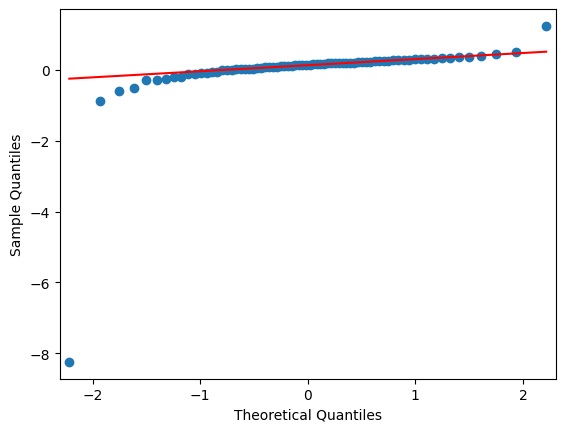

In [378]:
resid = arma_mod30.resid

stats.normaltest(resid)

## QQ-plot of residuals
fig = qqplot(resid, line='q', fit=True)
plt.show()



2001-01-01    16119276.0
2002-01-01    16707623.0
2003-01-01    17295970.0
2004-01-01    17884317.0
2005-01-01    18472664.0
2006-01-01    19061011.0
2007-01-01    19649358.0
2008-01-01    20237705.0
2009-01-01    20826052.0
2010-01-01    21414399.0
2011-01-01    22002746.0
2012-01-01    22591093.0
2013-01-01    23179440.0
2014-01-01    23767787.0
2015-01-01    24356134.0
2016-01-01    24944481.0
2017-01-01    25532828.0
2018-01-01    26121175.0
2019-01-01    26709522.0
2020-01-01    27297869.0
2021-01-01    27886216.0
2022-01-01    28474563.0
2023-01-01    29062910.0
2024-01-01    29651257.0
2025-01-01    30239604.0
2026-01-01    30827951.0
2027-01-01    31416298.0
2028-01-01    32004645.0
2029-01-01    32592992.0
Freq: YS-JAN, dtype: float64


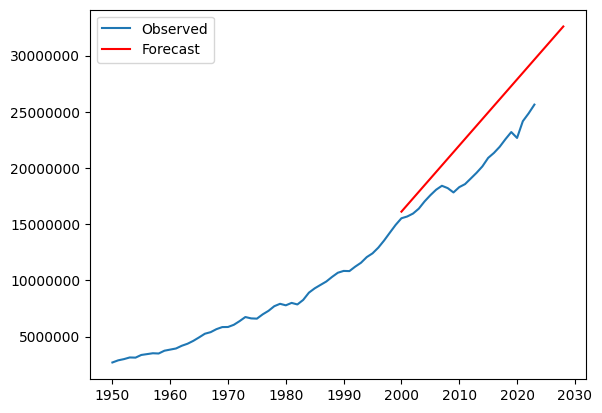

 Mean Squared Error: 13332247188004.77
 Mean Absolute Percentage Error: 12.963282270233071%


In [379]:
# predict 1990 to 2010 and plot observed vs predicted


plt.plot(df['rgdpe'], label='Observed')
#predict_rdgpo.plot(label='Forecast')
# forecast using model: 2000 to 2028
forecasts = model.predict(n_periods=test.shape[0] + 5)
print(forecasts)
# create date range for forecasts
forecast_dates = pd.date_range(start='2000', periods=test.shape[0] + 5, freq='YS')
# plot forecasts
plt.ticklabel_format(style='plain', axis='y')
plt.plot(forecast_dates, forecasts, label='Forecast', color='red')
plt.legend()
plt.show()
# get rid of 1e6, format y-axis normally
# get mean squared error
mse = ((forecasts[:test.shape[0]] - df['rgdpe']['2011':'2023']) ** 2).mean()
print(f' Mean Squared Error: {mse}')
# get root mean squared error
rmse = np.sqrt(mse)
# mape
mape = np.mean(np.abs((df['rgdpe']['2000':'2023'] - forecasts[:test.shape[0]]) / df['rgdpe']['2000':'2023'])) * 100
print(f' Mean Absolute Percentage Error: {mape}%')




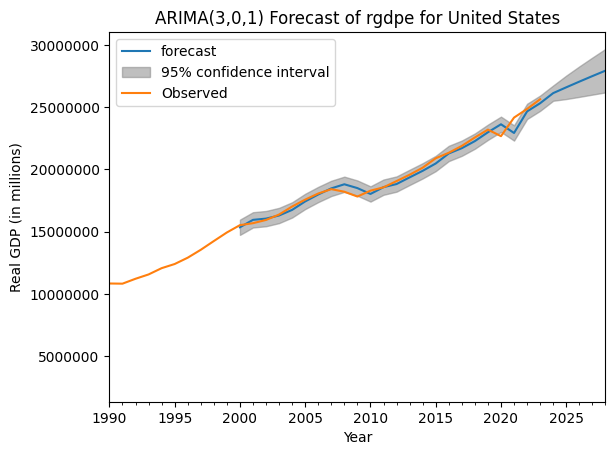

Mean Squared Error for ARIMA (3, 0,1): 174634122493.94946
Root Mean Squared Error for ARIMA (3, 0,1): 417892.47719233885
Mean Absolute Percentage Error for ARIMA (3, 0,1): 1.4983656186649505
CV Mean Squared Error ARIMA(3,0,1): 14992729909301.508
CV Mean Squared Error auto_arima: 4257703207291.98
Done with cross-validation.
auto_arima performed better in cross-validation.


In [380]:
# forecast to 2028, include confidence intervals as grey area around forecast
plot_predict(arma_mod30, start='2000', end='2028', ax=None)
df['rgdpe'].plot(label='Observed')
# make sure plot only shows from 2000 onwards
plt.xlim(['1990', '2028'])
# get rid of 1e6 notation on y-axis
plt.ticklabel_format(style='plain', axis='y')
# add title and labels
plt.title(f'ARIMA(3,0,1) Forecast of rgdpe for {country}')
plt.xlabel('Year')
plt.ylabel('Real GDP (in millions)')
plt.legend()
plt.show()  

# get mse and rmse for ARIMA model
preds = arma_mod30.predict(start='2000', end='2023')
mse_arima = ((preds - df['rgdpe']['2000':'2023']) ** 2).mean()
print(f'Mean Squared Error for ARIMA (3, 0,1): {mse_arima}')
rmse_arima = np.sqrt(mse_arima)
print(f'Root Mean Squared Error for ARIMA (3, 0,1): {rmse_arima}')
# mape
mape_arima = np.mean(np.abs((df['rgdpe']['2000':'2023'] - preds) / df['rgdpe']['2000':'2023'])) * 100
print(f'Mean Absolute Percentage Error for ARIMA (3, 0,1): {mape_arima}')

# try to do cross-validation on time series data with expanding window
import warnings
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(df['rgdpe']):
    train_cv, test_cv = df['rgdpe'].iloc[train_index], df['rgdpe'].iloc[test_index]
    #use arima_mod30 to fit on train_cv
    # make sure no ValueWarning or UserWarning is shown
    warnings.filterwarnings("ignore")
    model_cv_mod30 = ARIMA(train_cv, order=(3, 0, 1)).fit()
    model_cv_auto = auto_arima(train_cv, seasonal=False, trace=False)
    preds_cv_mod30 = model_cv_mod30.predict(start=test_cv.index[0], end=test_cv.index[-1])
    preds_cv_auto = model_cv_auto.predict(n_periods=len(test_cv))
    mse_cv_mod30 = ((preds_cv_mod30 - test_cv) ** 2).mean()
    mse_cv_auto = ((preds_cv_auto - test_cv) ** 2).mean()
print(f'CV Mean Squared Error ARIMA(3,0,1): {mse_cv_mod30}')
print(f'CV Mean Squared Error auto_arima: {mse_cv_auto}')
print('Done with cross-validation.')
# determine which model had the best mse
if mse_cv_mod30 < mse_cv_auto:
    print('ARIMA(3,0,1) performed better in cross-validation.')
else:
    print('auto_arima performed better in cross-validation.')
